# DNA methylation measurement by sequencing

Methyl-Seq

Piero Palacios Bernuy

# Whole-genome bisulfite sequencing (WGBS)

In [ ]:
library(bsseq)

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: S4Vectors


Attaching package: 'S4Vectors'

The following object is masked from 'package:utils':

    findMatches

The following objects are masked from 'package:base':

    expand.grid, I, unname

Loading required package: IRanges


Attaching package: 'IRanges'

The following object is masked from 'package:grDevices':

    windows

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'MatrixGenerics'

The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, rowTabulates, rowVarDiffs, rowVars,
    rowWeightedMads, rowWeightedMeans, rowWeightedMedians,
    rowWeightedSds, rowWeig

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Attaching package: 'Biobase'

The following object is masked from 'package:MatrixGenerics':

    rowMedians

The following objects are masked from 'package:matrixStats':

    anyMissing, rowMedians

The metadata loaded below can be downloaded from SRA from NCBI or from GEO (GSE46644).

In [ ]:
targets <- read.table(file.path("targets2.txt"),header = T, sep = "\t")

targets <- DataFrame(targets, row.names = as.character(targets$Run))

``` r

# This code is not executed due to limit size (50 mb) of github
# Please load the 450karrar_processed.rds data that is the resulto of this code
# If you want to do this with the original data, you can find this data on: 
# https://github.com/genomicsclass/colonCancerWGBS

path <- paste0(getwd(),"/colonCancerWGBS-master")

targets <- read.table(file.path(path,"targets2.txt"),header = T, sep = "\t")

targets <- DataFrame(targets, row.names = as.character(targets$Run))

covfiles <- file.path(path, paste0(rownames(targets), ".chr22.cov"))

colonCancerWGBS <- read.bismark(files = covfiles, rmZeroCov = TRUE,
                                colData = targets)
```

In [ ]:
colonCancerWGBS <- readRDS("methyl_seq.rds")

In [ ]:
cov <- getCoverage(colonCancerWGBS,type = "Cov")
m <- getCoverage(colonCancerWGBS,type = "M")

# proportion of cpgs that have coverage in all samples

index=apply(cov>0,1,all)
mean(index)

[1] 0.7743644

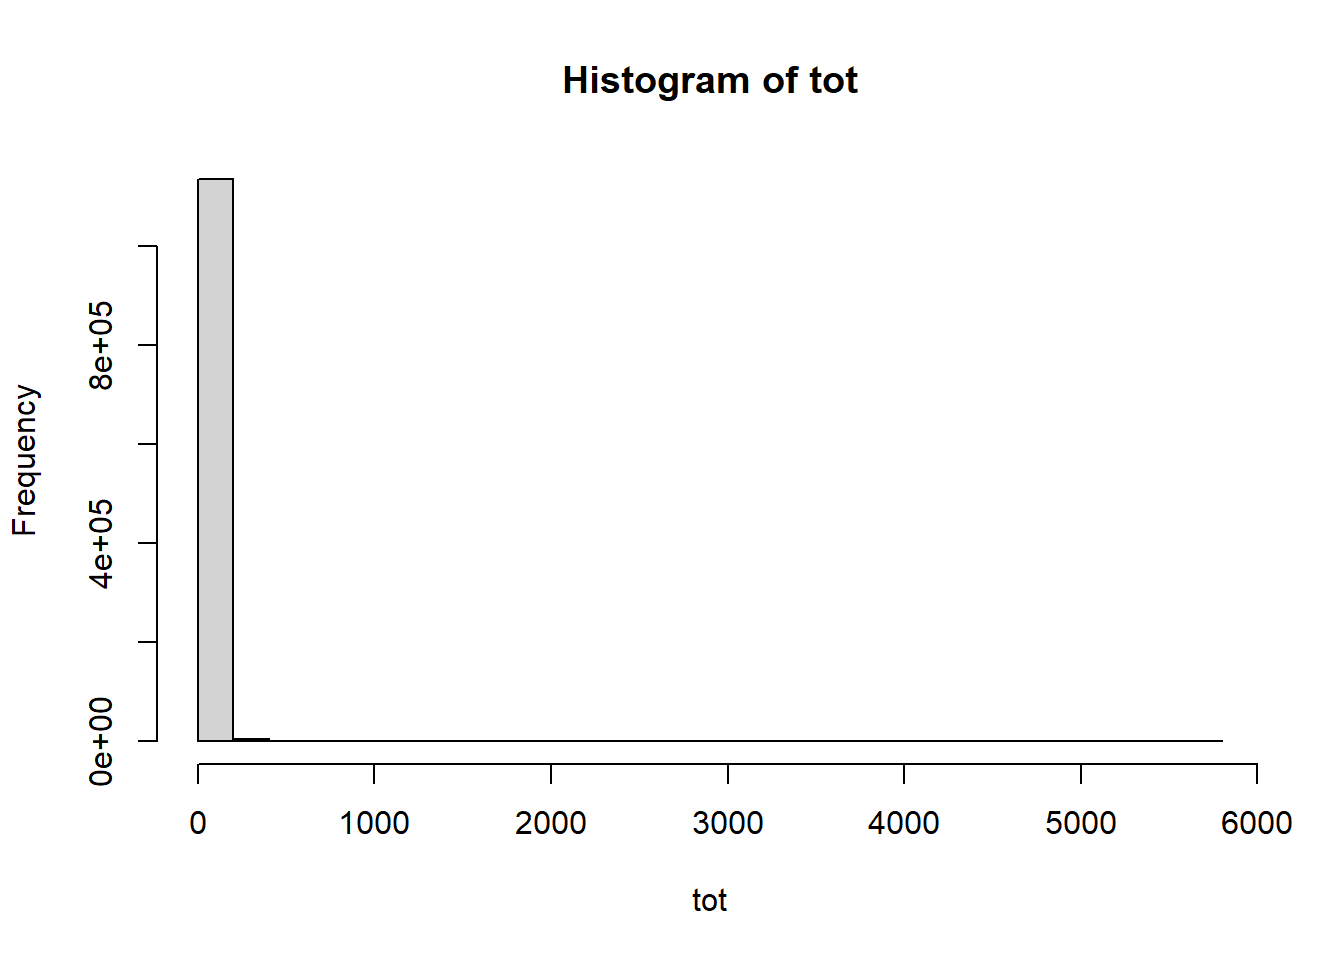

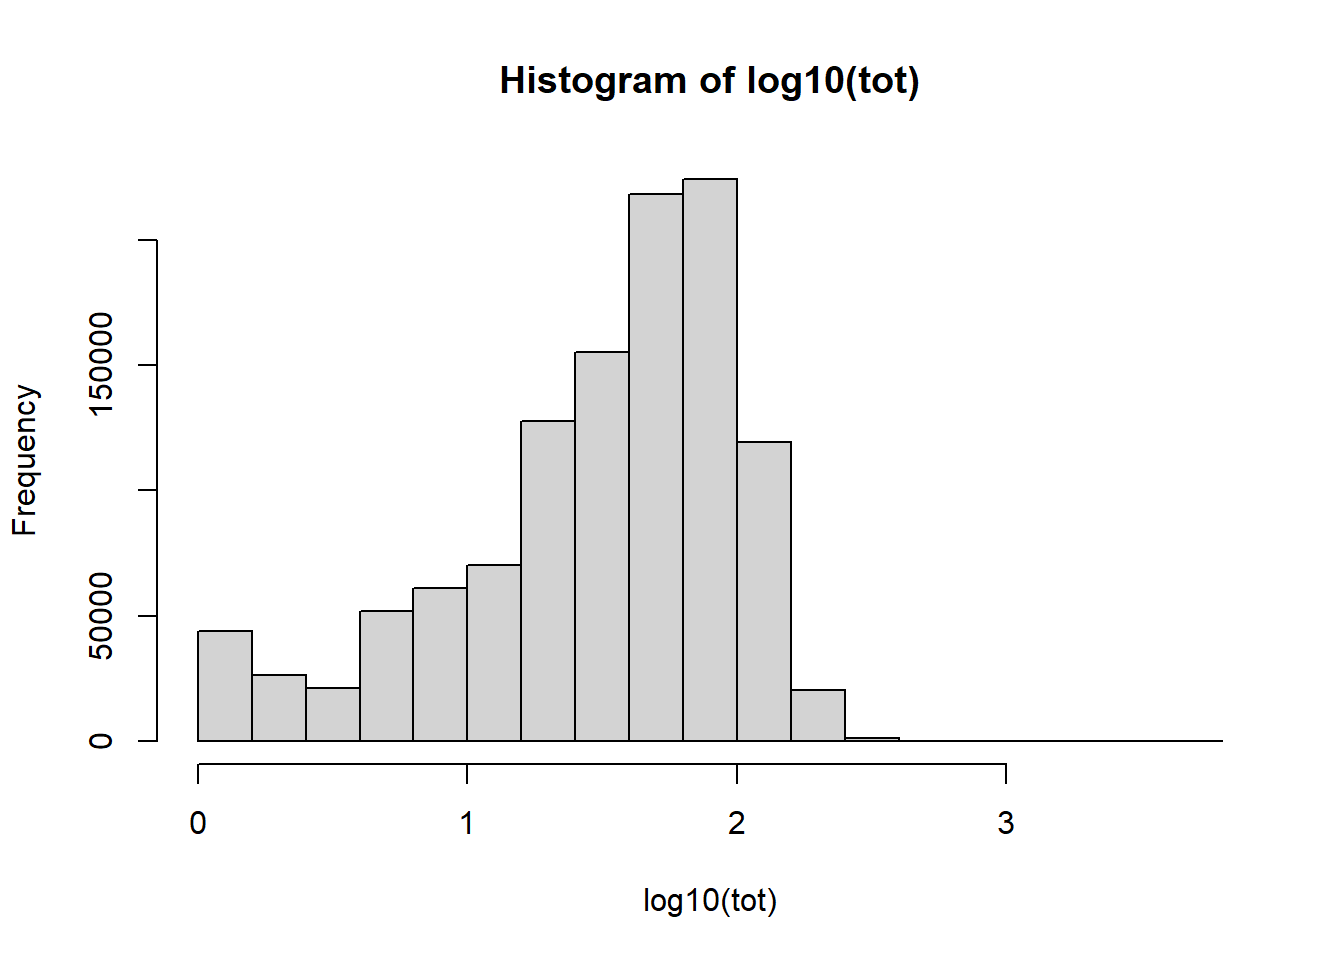

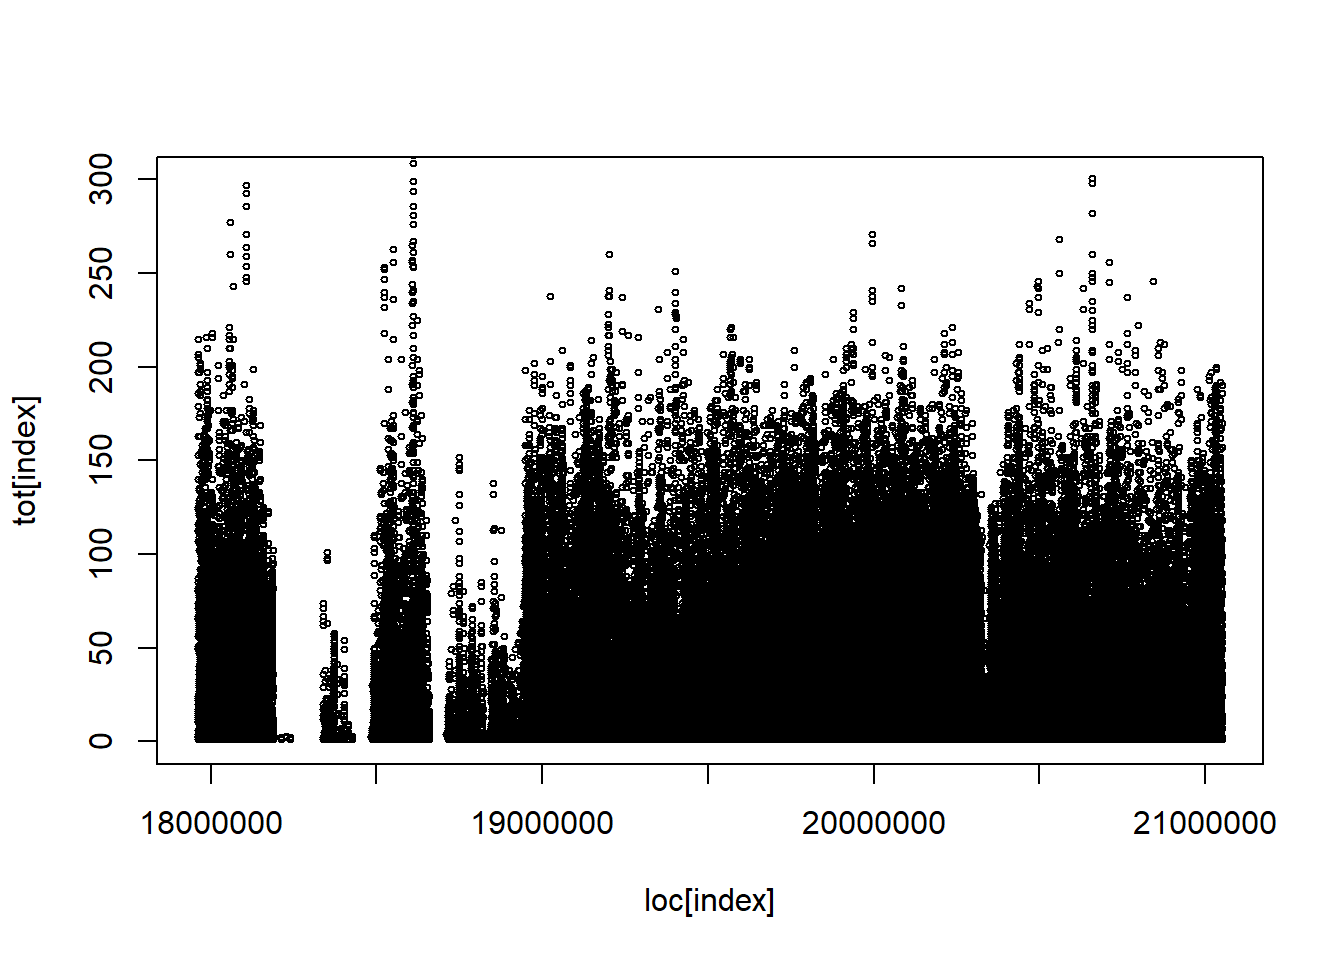

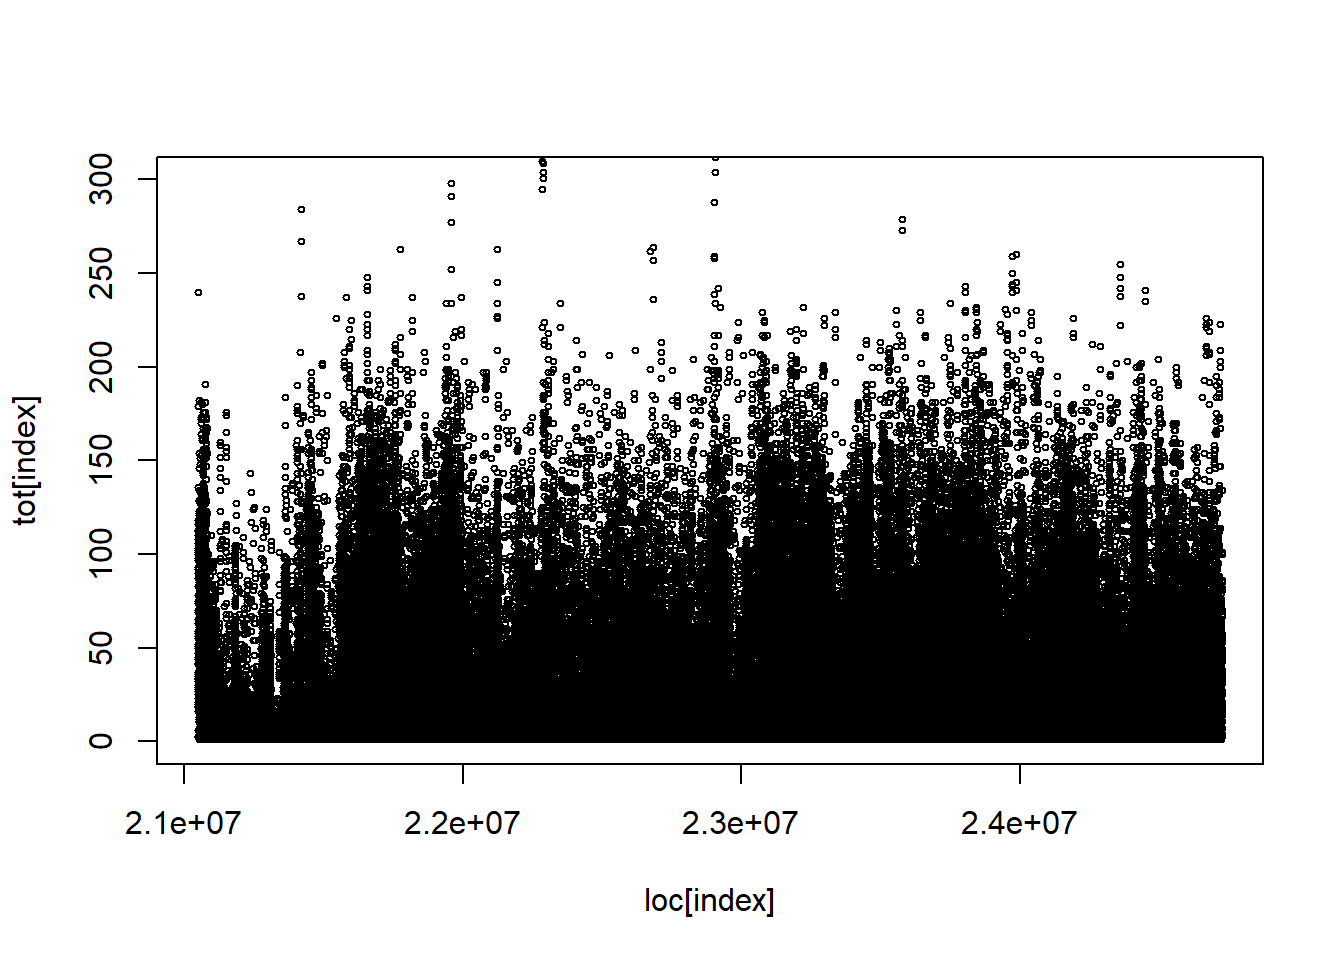

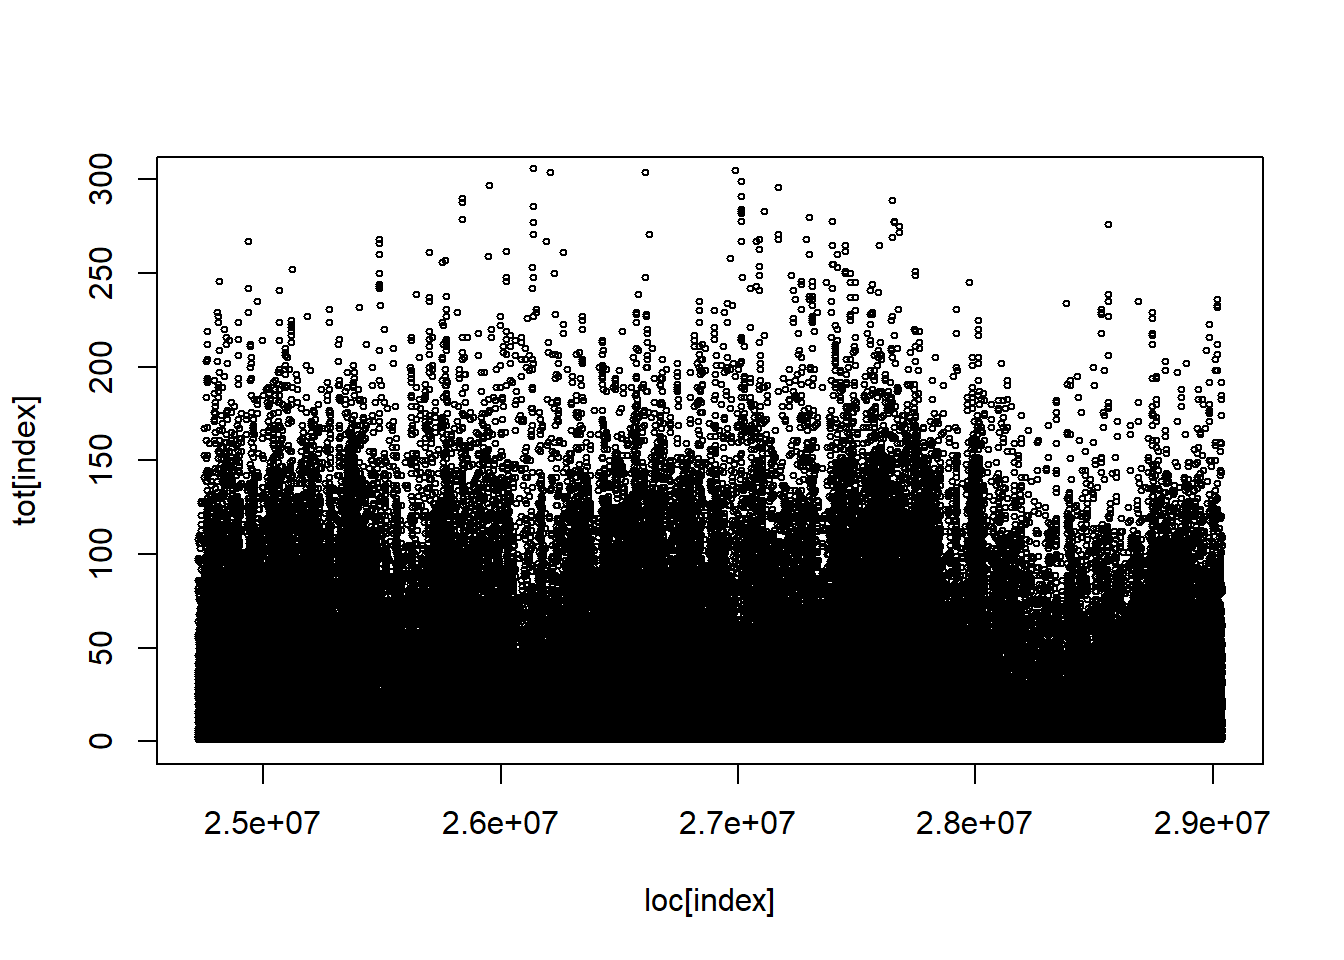

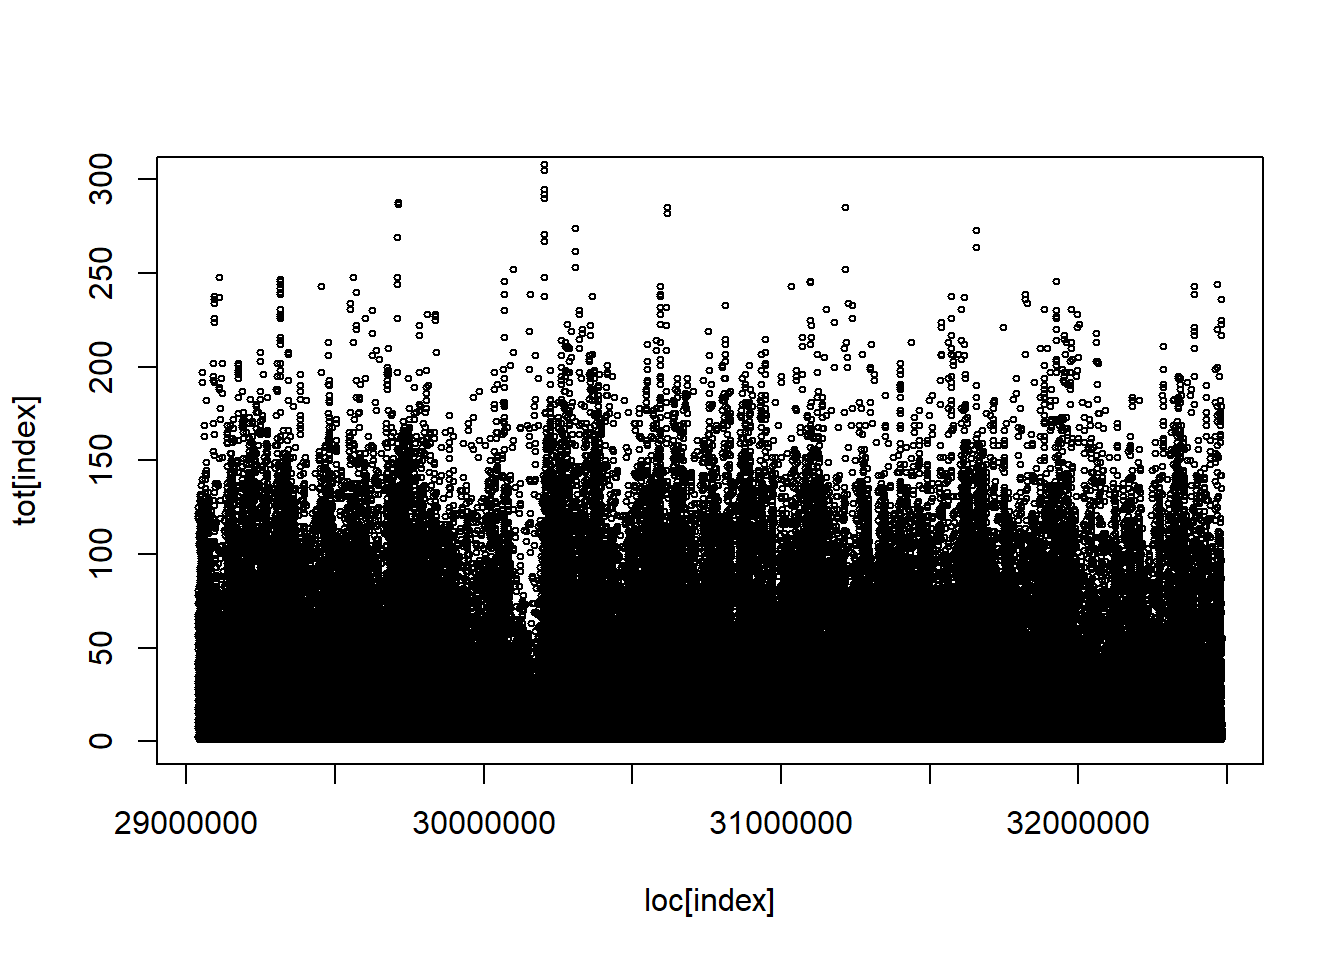

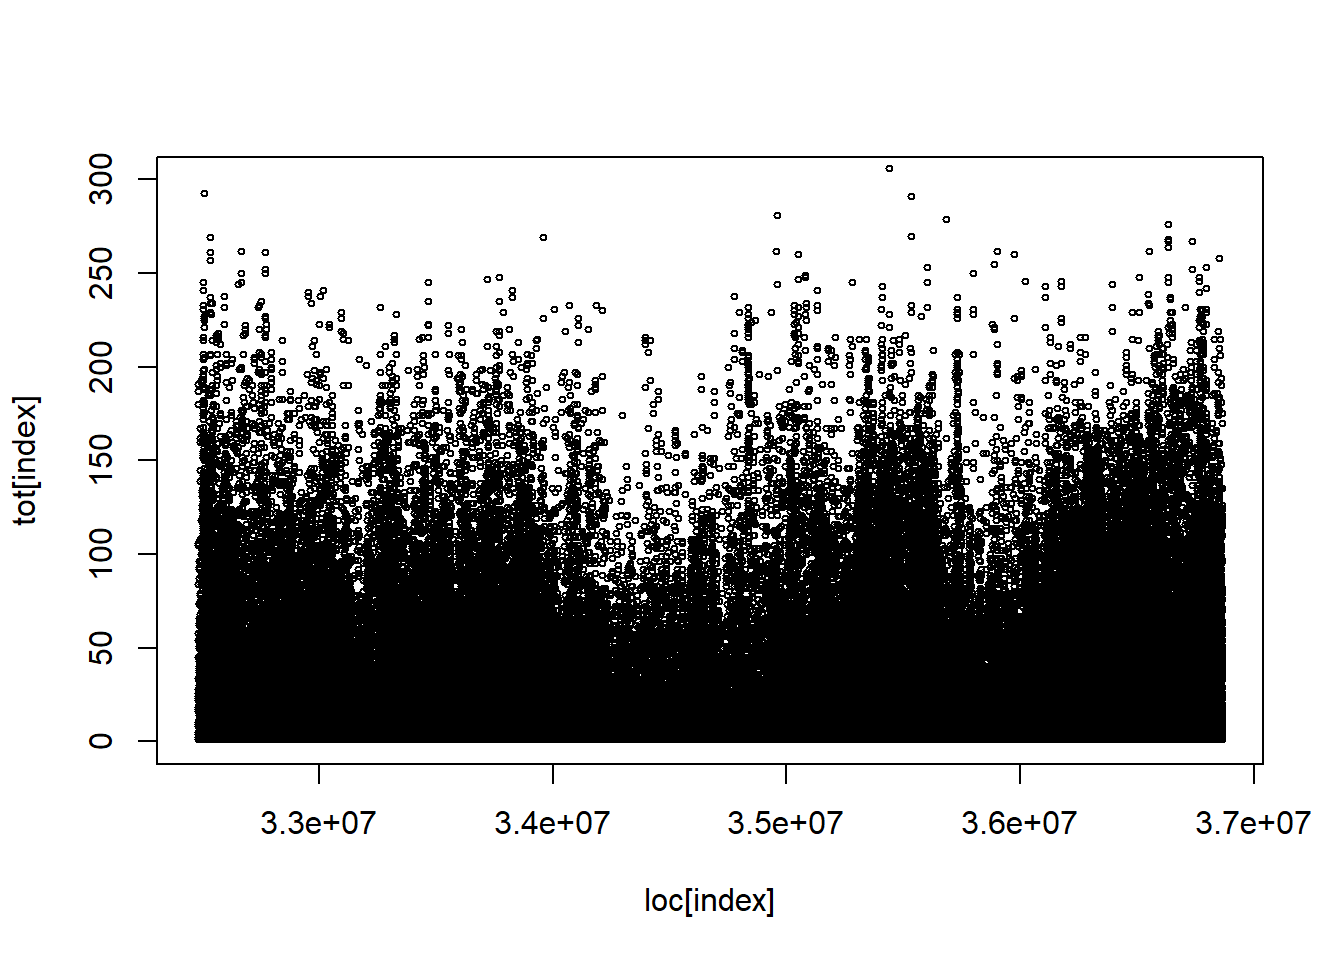

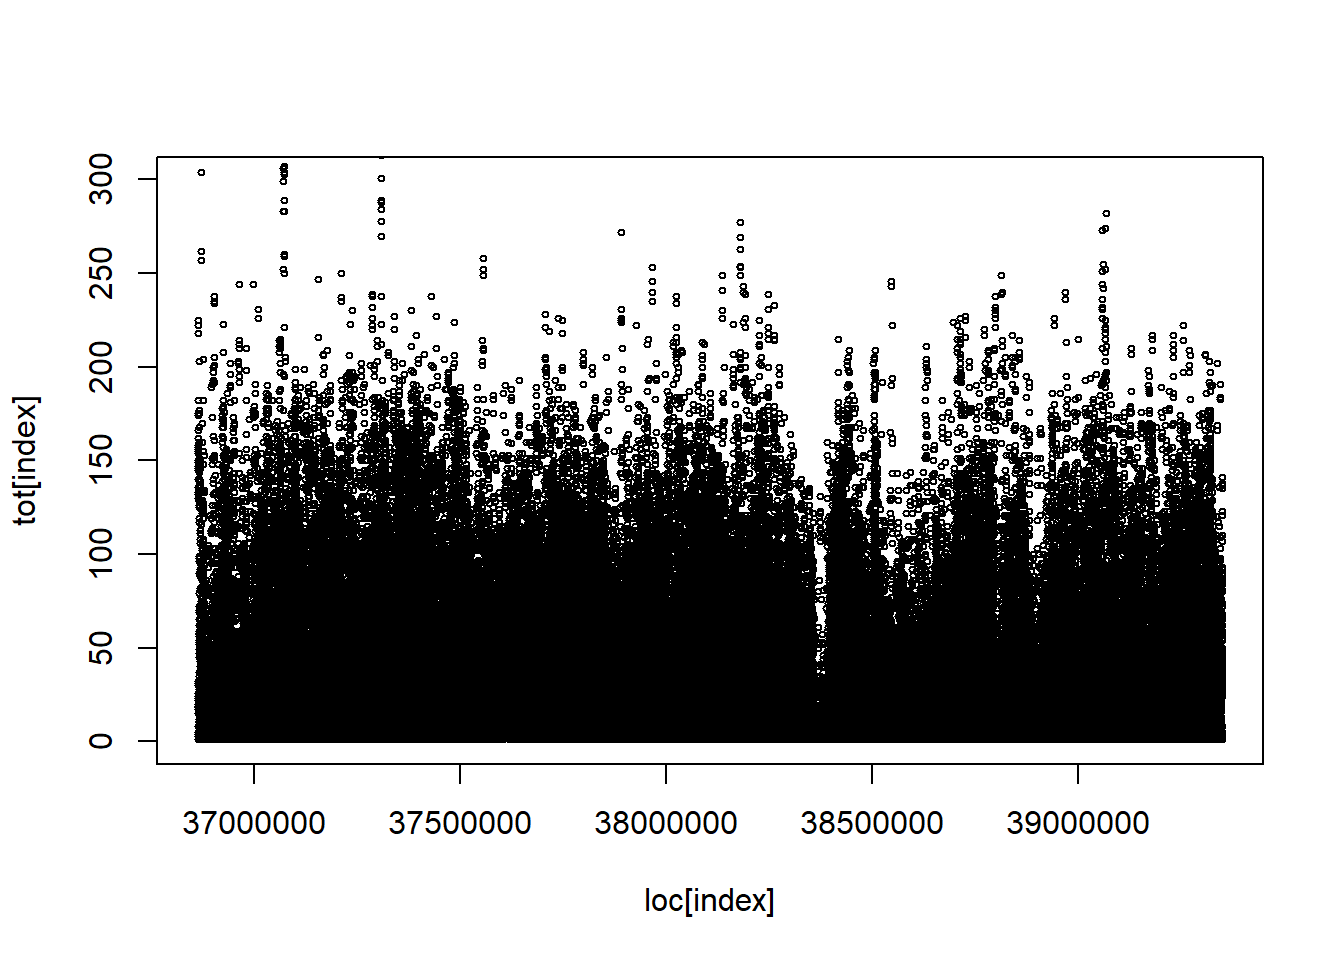

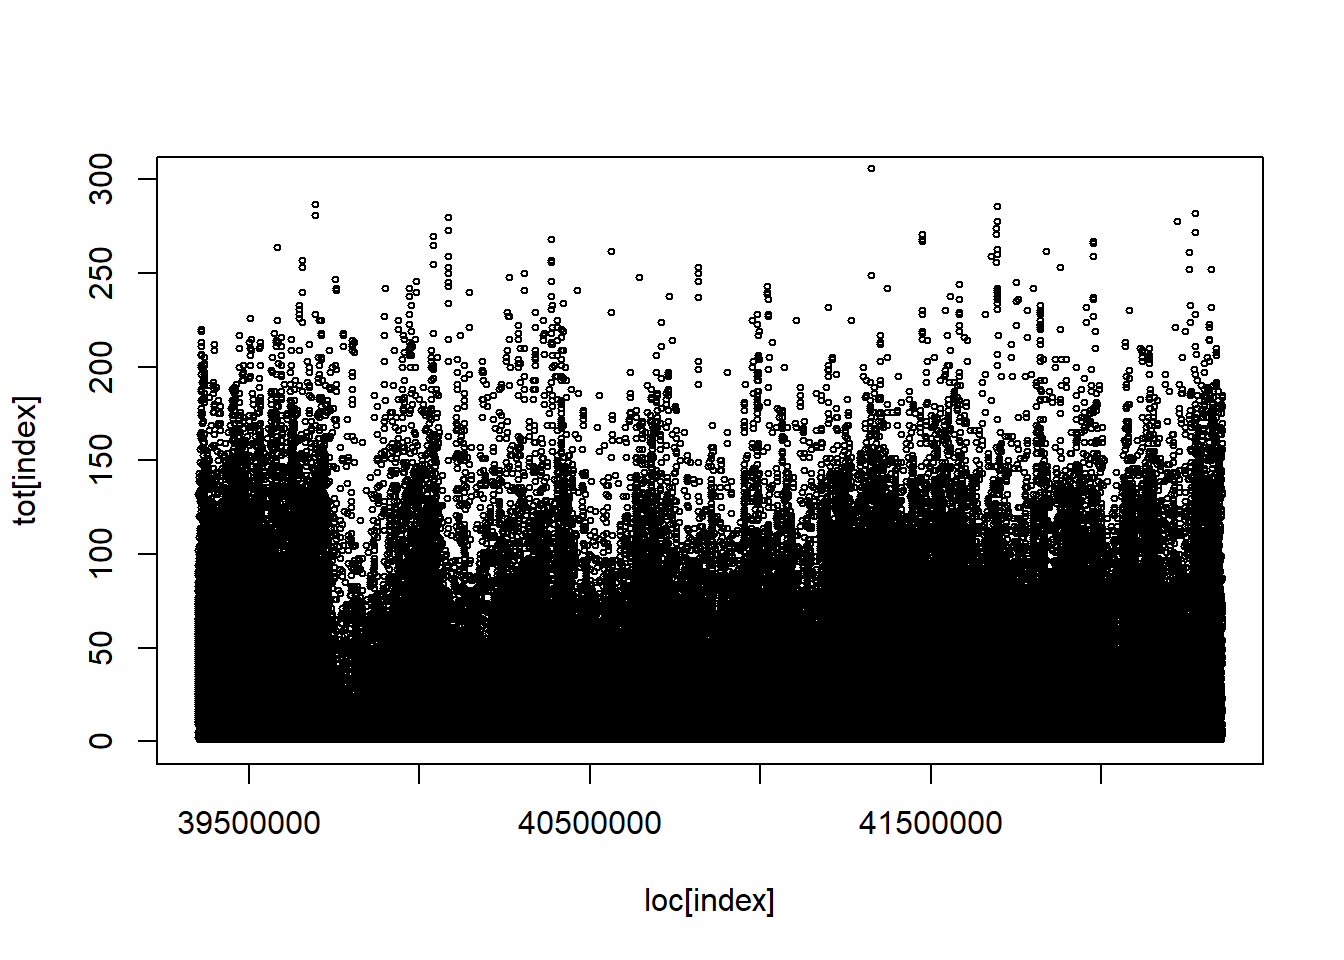

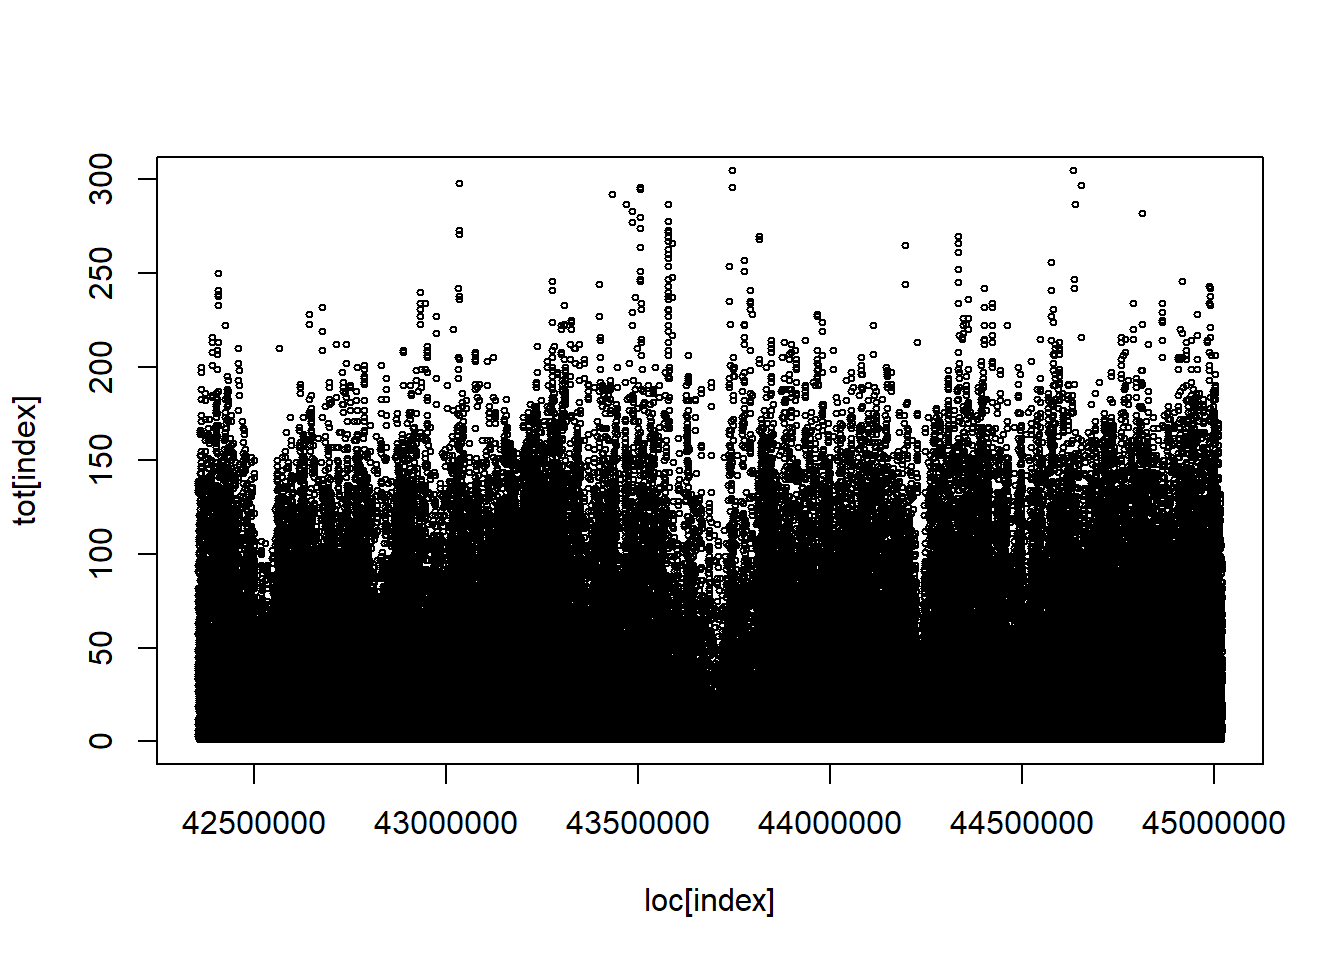

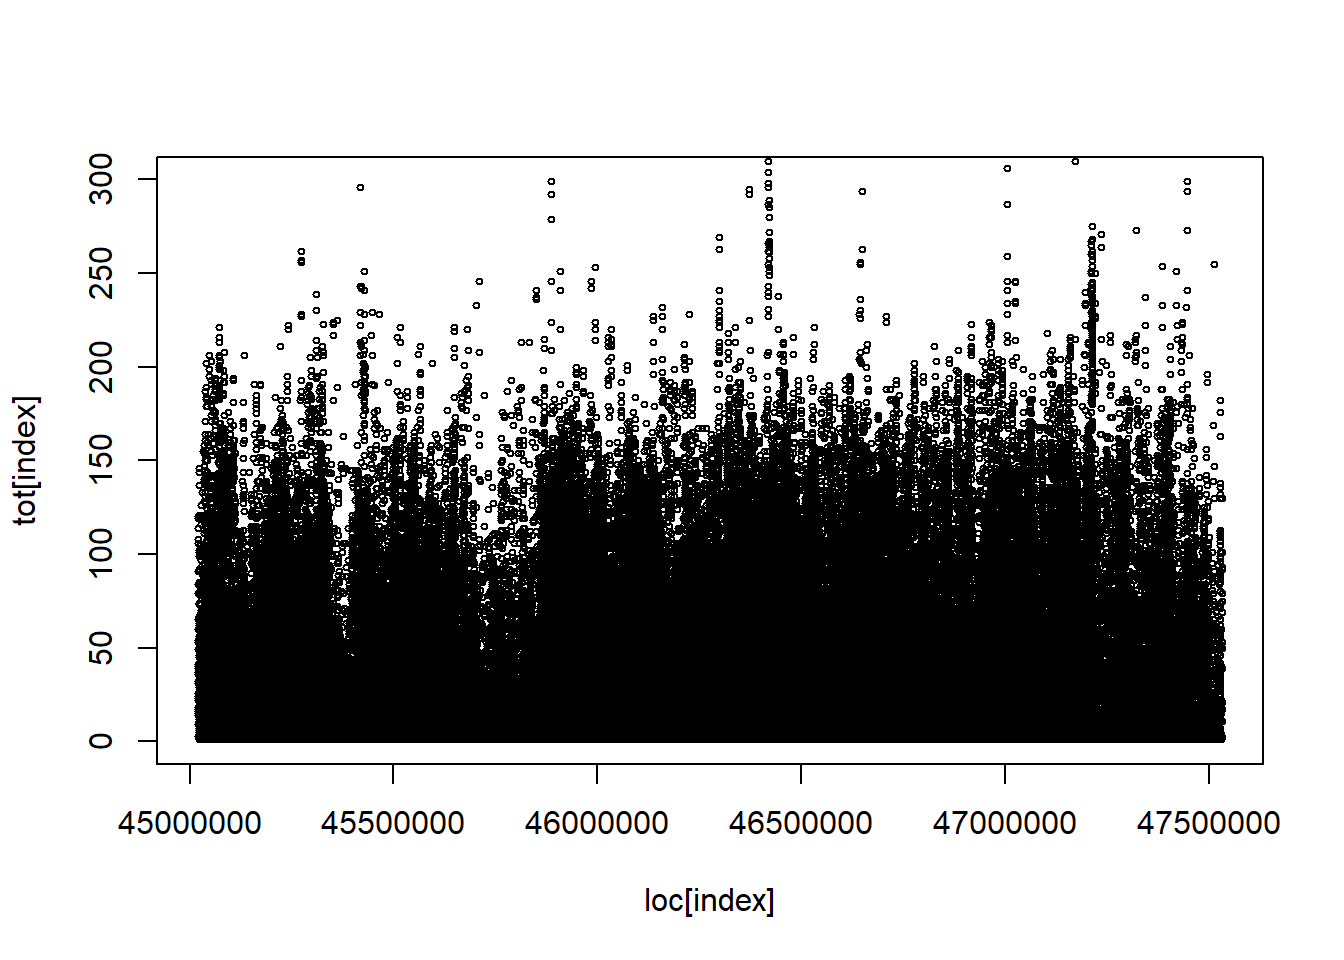

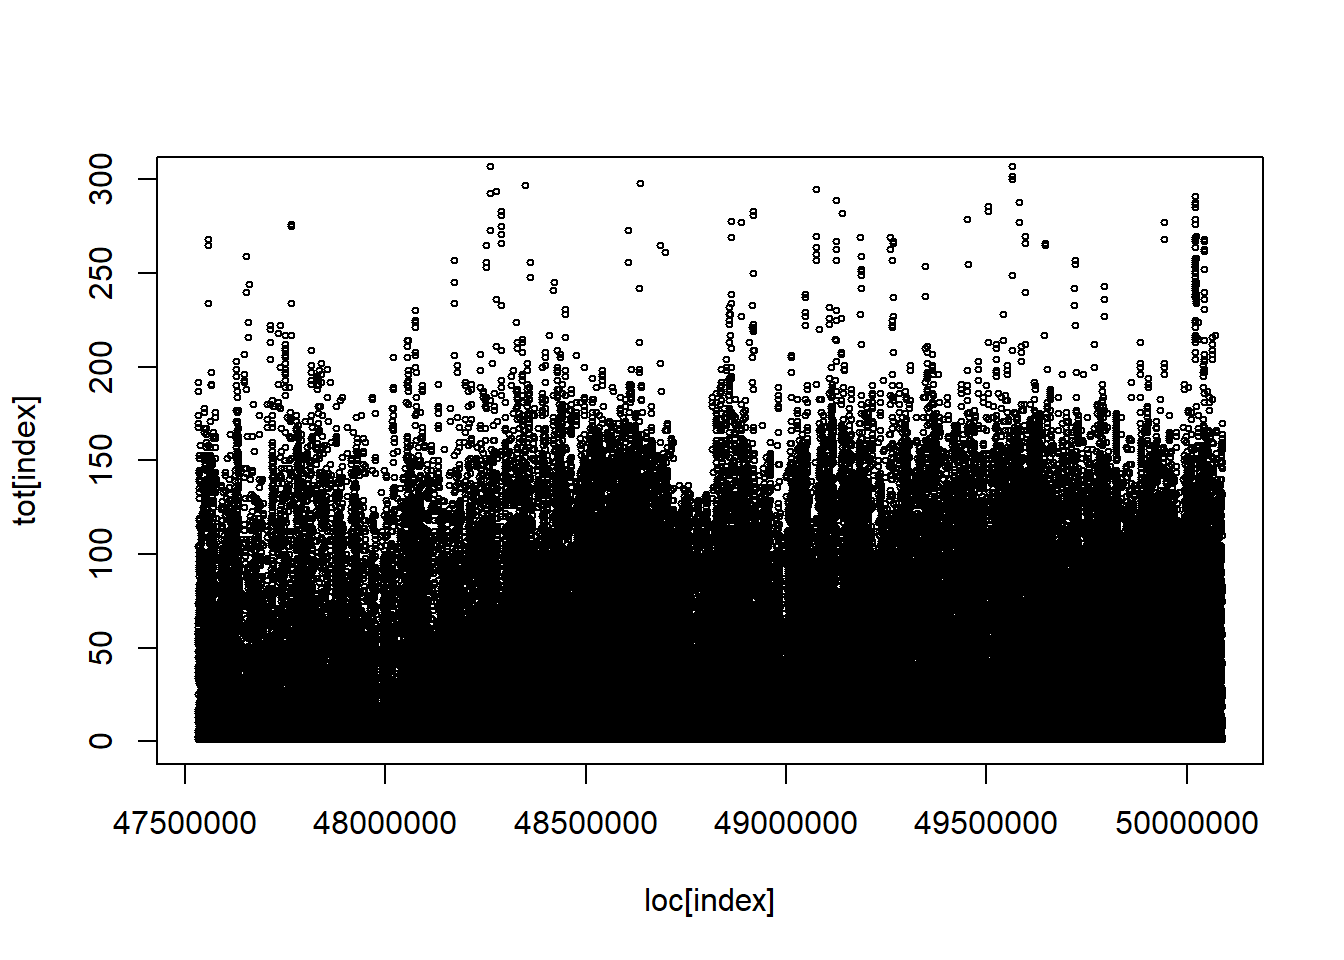

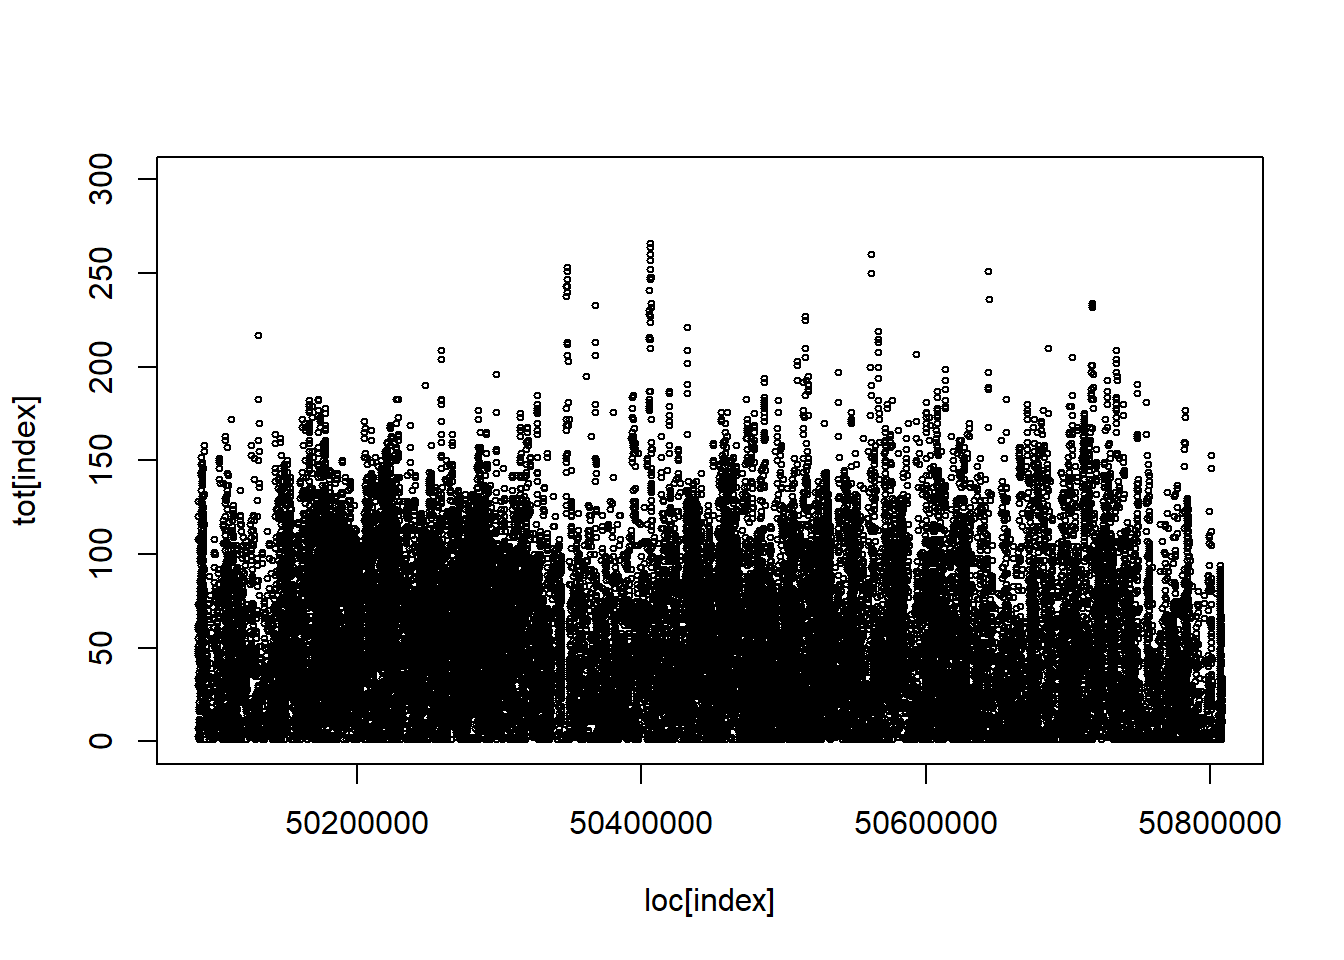

In [ ]:
tot = rowSums(cov)

hist(tot)

In [ ]:
# Methylation status
meth_status <- m/cov
meth_status |> tail()

           SRR949210 SRR949211 SRR949212 SRR949213 SRR949214 SRR949215
[1140635,] 0.6666667         1      0.75 0.8571429 1.0000000 0.8888889
[1140636,] 0.3333333       NaN      0.60 0.8750000 1.0000000 0.8750000
[1140637,] 0.5000000       NaN      0.75 1.0000000 0.6666667 0.8571429
[1140638,] 0.5000000       NaN      0.50 0.7500000 0.3333333 0.7500000
[1140639,] 0.5000000       NaN      0.50 1.0000000 0.5000000 0.8333333
[1140640,] 0.5000000       NaN      1.00 0.0000000 0.0000000 1.0000000

           SRR949210 SRR949211 SRR949212 SRR949213 SRR949214 SRR949215
[1140635,] 0.5773503         1 0.5000000 0.3779645 1.0000000 0.3333333
[1140636,] 0.5773503       Inf 0.4472136 0.3535534 0.7071068 0.3535534
[1140637,] 0.5000000       Inf 0.5000000 0.5000000 0.5773503 0.3779645
[1140638,] 0.5000000       Inf 0.5000000 0.5000000 0.5773503 0.5000000
[1140639,] 0.5000000       Inf 0.7071068 0.7071068 0.7071068 0.4082483
[1140640,] 0.7071068       Inf 0.7071068 1.0000000 1.0000000 0.4472136

# Data Analysis

First we need to smooth the data:

In [ ]:
library(BiocParallel)

Warning in BiocParallel::MulticoreParam(workers = 8): MulticoreParam() not
supported on Windows, use SnowParam()

Warning in lfproc(x, y, weights = weights, cens = cens, base = base, geth =
geth, : procv: parameters out of bounds

Warning in lfproc(x, y, weights = weights, cens = cens, base = base, geth =
geth, : procv: parameters out of bounds

Warning in lfproc(x, y, weights = weights, cens = cens, base = base, geth =
geth, : procv: parameters out of bounds

Warning in lfproc(x, y, weights = weights, cens = cens, base = base, geth =
geth, : procv: parameters out of bounds

Warning in lfproc(x, y, weights = weights, cens = cens, base = base, geth =
geth, : procv: parameters out of bounds

Warning in lfproc(x, y, weights = weights, cens = cens, base = base, geth =
geth, : procv: parameters out of bounds

Warning in lfproc(x, y, weights = weights, cens = cens, base = base, geth =
geth, : procv: parameters out of bounds

Warning in lfproc(x, y, weights = weights, cens = cens, base = base, geth =
geth, : procv: parameters out of bounds

Warning in lfproc(x, y, weights = weights, cens = cens, base = b

In [ ]:
# Average coverage of CpGs 
round(colMeans(getCoverage(bs_fit)), 1)

SRR949210 SRR949211 SRR949212 SRR949213 SRR949214 SRR949215 
      7.6       7.6       8.7       8.8       8.7       8.8 

[1] 1140640

[1] 883271

[1] 0

# Filtering loci

There isn’t a manual for this task.

In [ ]:
keep_loci <- which(rowSums(cov[, bs_fit$title == "Colon_Tumor_Primary"] >= 2) >= 2 &
                     rowSums(cov[, bs_fit$title == "Colon_Primary_Normal"] >= 2) >= 2)

keep_loci |> length()

[1] 891744

In [ ]:
bs_fit <- bs_fit[keep_loci,]
bs_fit

An object of type 'BSseq' with
  891744 methylation loci
  6 samples
has been smoothed with
  BSmooth (ns = 70, h = 1000, maxGap = 100000000) 
All assays are in-memory

# Compute t-statistics

In [ ]:
bs_tstat <- BSmooth.tstat(BSseq = bs_fit, group1 = c("SRR949210","SRR949211","SRR949212"), group2 = c("SRR949213","SRR949214","SRR949215"), estimate.var = "group2", local.correct = T, verbose = T)

[BSmooth.tstat] preprocessing ... done in 0.5 sec
[BSmooth.tstat] computing stats within groups ... done in 0.6 sec
[BSmooth.tstat] computing stats across groups ... done in 1.4 sec

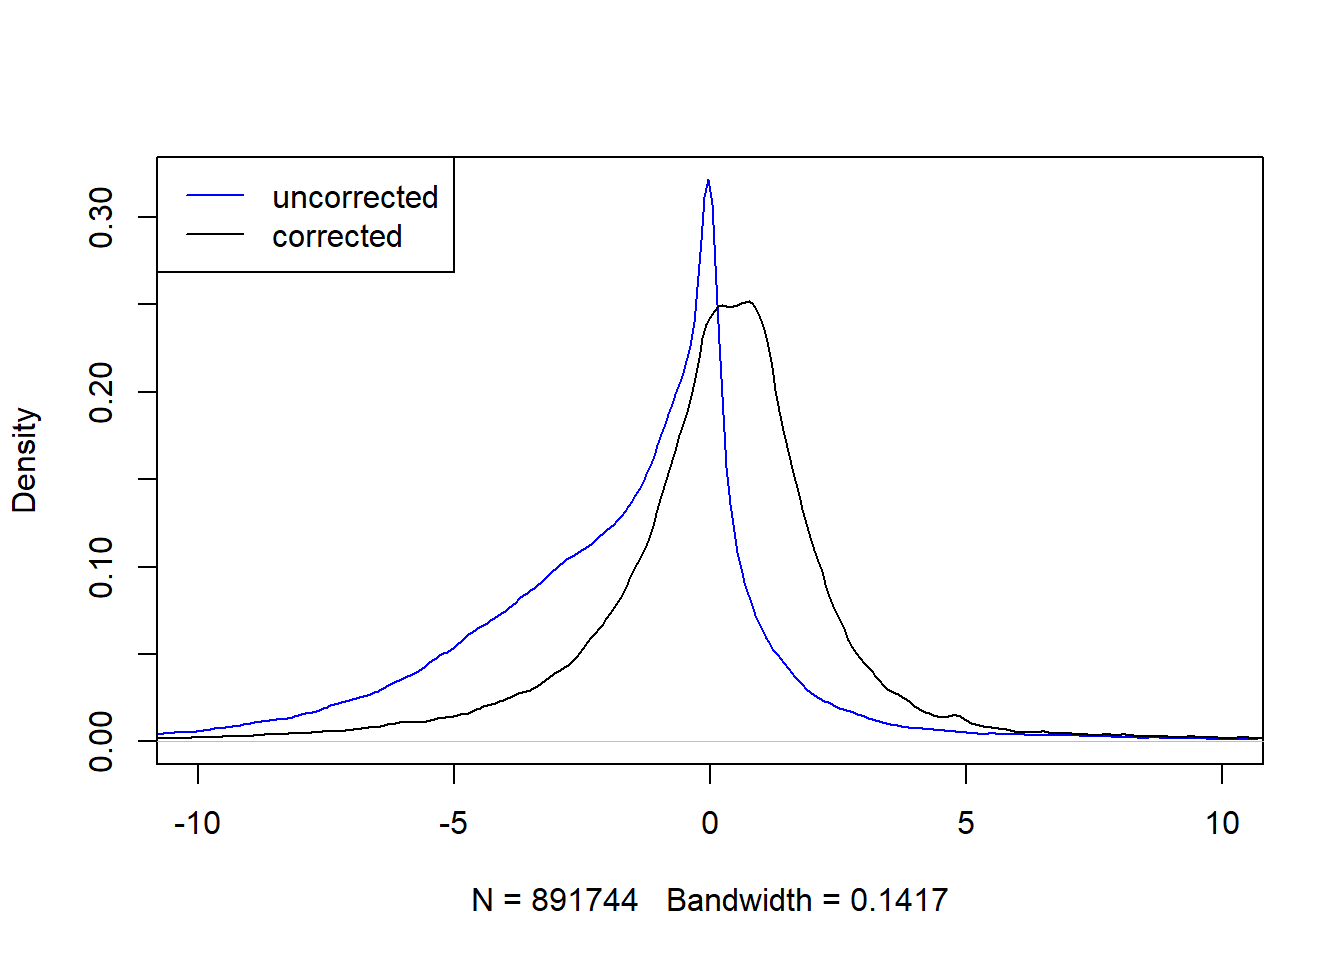

In [ ]:
plot(bs_tstat)

# Finding DMR’s

In [ ]:
dmrs0 <- dmrFinder(bs_tstat, cutoff = c(-4.6, 4.6))

[dmrFinder] creating dmr data.frame

[1] 2658

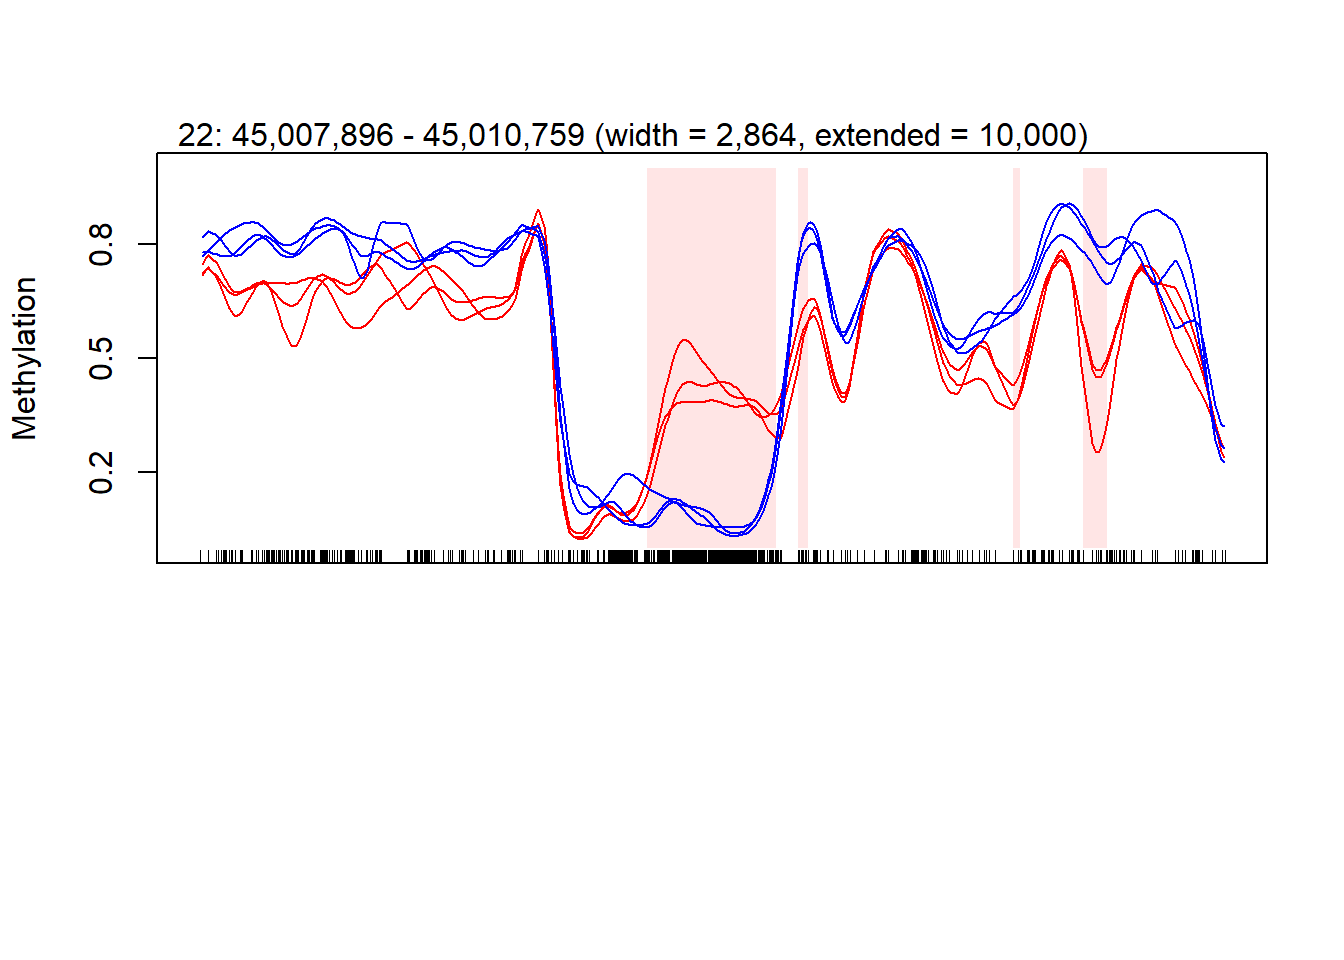

In [ ]:
#| label: fig-dmr

df <- pData(bs_fit)
df$col <- rep(c("red", "blue"), each=3)

pData(bs_fit) <- df

plotRegion(bs_fit, dmrs[1,], extend = 10000, addRegions = dmrs)

# Other type of plots

In [ ]:
library(Gviz)

Loading required package: grid

Warning in .local(x, ...): 'track' parameter is deprecated now you go by the 'table' instead
                Use ucscTables(genome, track) to retrieve the list of tables for a track

Warning in .local(x, ...): 'track' parameter is deprecated now you go by the 'table' instead
                Use ucscTables(genome, track) to retrieve the list of tables for a track

In [ ]:
png(file="track_methyl_seq_plot.png", width = 1200, height = 550)

plotTracks(list(iTrack,gTrack, methTrack, dmrTrack, rTrack),add53=T, add35=T,grid=T,sizes=sizes,groups = rep(c("Colon_Tumor_Primary","Colon_Primary_Normal"), each=3),from = 44.9e6,to = 45.2e6)

dev.off()

png 
  2 